In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import esm2m.config_perturbations as cp
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [3]:
mpl.rcParams['font.size'] = 20

In [4]:
rootdir = '/work/gam/projects/bio-pump-timescales/esm2m/data/global_integrals/'
override = False
rootdir = cp.add_override_suffix(rootdir,override)
localdir = 'bling'
variable = '*'

experiments = ['','_gat','_zero','_double']
dd = {}
for e in experiments:
    path = rootdir+localdir+e+'/esm2m_'+variable+e+'.nc'
    dd[e] = xr.open_mfdataset(path)

In [5]:
# Calculate anomaly
ddanom = cp.calc_anom(dd)

In [6]:
def plot_ts(ddanom, variables, experiments=['double','zero'], variables_cumsum = None, save=False):
    '''Time-series plot of [variables]. Specify list of variables that you want to
    plot as cumulative sum in [variables_cumsum]. One experiment plotted per row.'''
    # Assign colors
    tableau = ['blue','orange','green','red','purple',
           'brown','pink','gray','olive','cyan']
    colors = {}
    for j,variable in enumerate(variables):
        colors[variable] = 'tab:'+tableau[j]
    
    ne = len(experiments)
    fig,axarr = plt.subplots(figsize=(16,8),nrows=2)
    tkw = dict(size=6, width=1.5)
    for i,e in enumerate(experiments):
        ds = ddanom[e]
        ax = axarr.flat[i]
        for j,variable in enumerate(variables):
            if j==0:
                axnow = axarr.flat[i]
                axnow.plot(ds['time'],xr.zeros_like(ds['time']),'k--')
            else:
                axnow = axarr.flat[i].twinx()
                offsetax = 1+(j-1)/10
                axnow.spines.right.set_position(("axes",offsetax))
                
            if (variables_cumsum is not None):
                if (variable in variables_cumsum):
                    ts = ds[variable].cumsum('time')
                else:
                    ts = ds[variable]
            else:
                ts = ds[variable]
                
            p, = axnow.plot(ds['time'],ts,color=colors[variable])
            # y-axis origin to same point for all variables
            yabs_max = abs(max(axnow.get_ylim(),key=abs))
            axnow.set_ylim(ymin=-yabs_max, ymax=yabs_max)
            axnow.set_ylabel(variable)
            axnow.yaxis.label.set_color(p.get_color())
            axnow.tick_params(axis='y', colors=p.get_color(), **tkw)
            axnow.autoscale(enable=True,axis='x',tight=True)
        ax.set_title(e)
    fig.tight_layout()

    if save:
        savekwargs = {'transparent':True,'dpi':300}
        savename = ''
        for variable in variables:
            if (variables_cumsum is not None):
                if (variable in variables_cumsum):
                    savename+='cs-'+variable+'.'
                else:
                    savename+=variable+'.'
            else:
                savename+=variable+'.'
        fig.savefig('figures/ts_'+savename+'png',**savekwargs)
    
    return fig


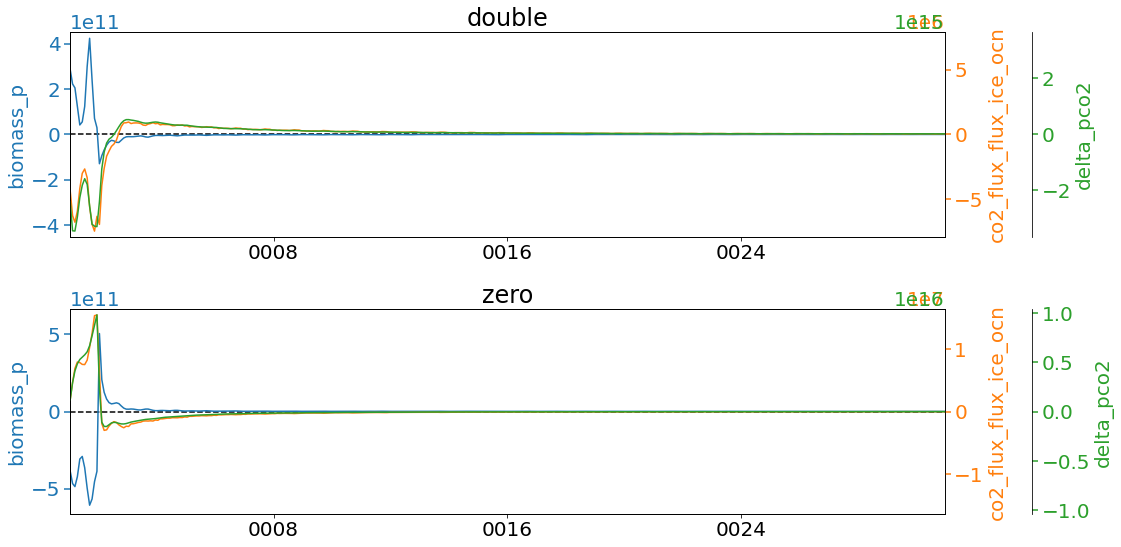

In [7]:
variables = ['biomass_p','co2_flux_flux_ice_ocn','delta_pco2']
save = True
experiments = ['double','zero']
variables_cumsum = None
fig = plot_ts(ddanom,variables,experiments,variables_cumsum=variables_cumsum,save=save)